In [15]:
import numpy as np
import os
import glob
import pandas as pd
parent_dir_path=os.path.abspath( os.path.join(os.getcwd(),'..')) 

In [16]:
main_direct=parent_dir_path+'/demos/'
ana_mr_39=np.loadtxt(main_direct+'ana_mr_39.txt')
ana_pran_39=np.loadtxt(main_direct+'ana_pran_39.txt')
phe_mr_39=np.loadtxt(main_direct+'phenom_mr_modify_n39.txt')
phe_pran_39=np.loadtxt(main_direct+'phe_pran.txt')
obs_mr_53=np.loadtxt(main_direct+'mr_obs_53.txt')
mr_all_info=pd.read_csv(main_direct+'39_mr_all_info.csv')
obs_mr_39=obs_mr_53[0:39*10000]

In [17]:
ana_pran=np.zeros(39)
for i in range(39):
    ana_pran[i]=np.mean( ana_pran_39[i*10000:(i+1)*10000] )

In [18]:
mr_39_part1=np.zeros((39,2))
mr_39_part1[:,0]=ana_pran
mr_39_part1[:,1]=phe_pran_39
df_mr_39_part1=pd.DataFrame(mr_39_part1,columns=['p0ana','p0phe'])
df_mr_39_all=pd.concat((mr_all_info,df_mr_39_part1),axis=1)
df_mr_39_partinfo=df_mr_39_all[['Pname','P0','p0ana','p0phe']]

In [19]:
pnames=['J0514$-$4002A', 'J1829+2456' ,'B1534+12' ,'J0737$-$3039A' ,'J0509+3801',
 'J1757$-$1854', 'J1756$-$2251' ,'B2127+11C', 'J1807$-$2500B','B1913+16',
 'J0453+1559' ,'J1913+1102' ,'J1802$-$2124', 'J2045+3633' ,'J1918$-$0642',
 'J1910$-$5959A' ,'J1949+3106' ,'J1713+0747' ,'J2234+0611' ,'J2043+1711',
 'J2053+4650' ,'J0337+1715' ,'J0437$-$4715', 'J1738+0333' ,'J1909$-$3744',
 'J1950+2414' ,'J1125$-$6014' ,' J1857+0943' ,'J0751+1807' ,'J0955$-$6150',
 'J1012+5307' ,'J1600$-$3053' ,'J1946+3417' ,'J2222$-$0137' ,'J1614$-$2230',
 'J0348+0432' ,'J0740+6620' ,'J1903+0327' ,'J0030+0451']
sort_mr_indexs=[12,  0, 13, 14,  1, 15,  2,  3,  4, 16,  5,  6, 17, 18,  7,  8, 19,
       20, 21,  9, 38, 22, 23, 24, 25, 26, 27, 10, 11, 28, 37, 29, 30, 31,
       32, 33, 34, 35, 36] 
#(df_mr_39_all.sort_values(['mr']) ).index

# plot

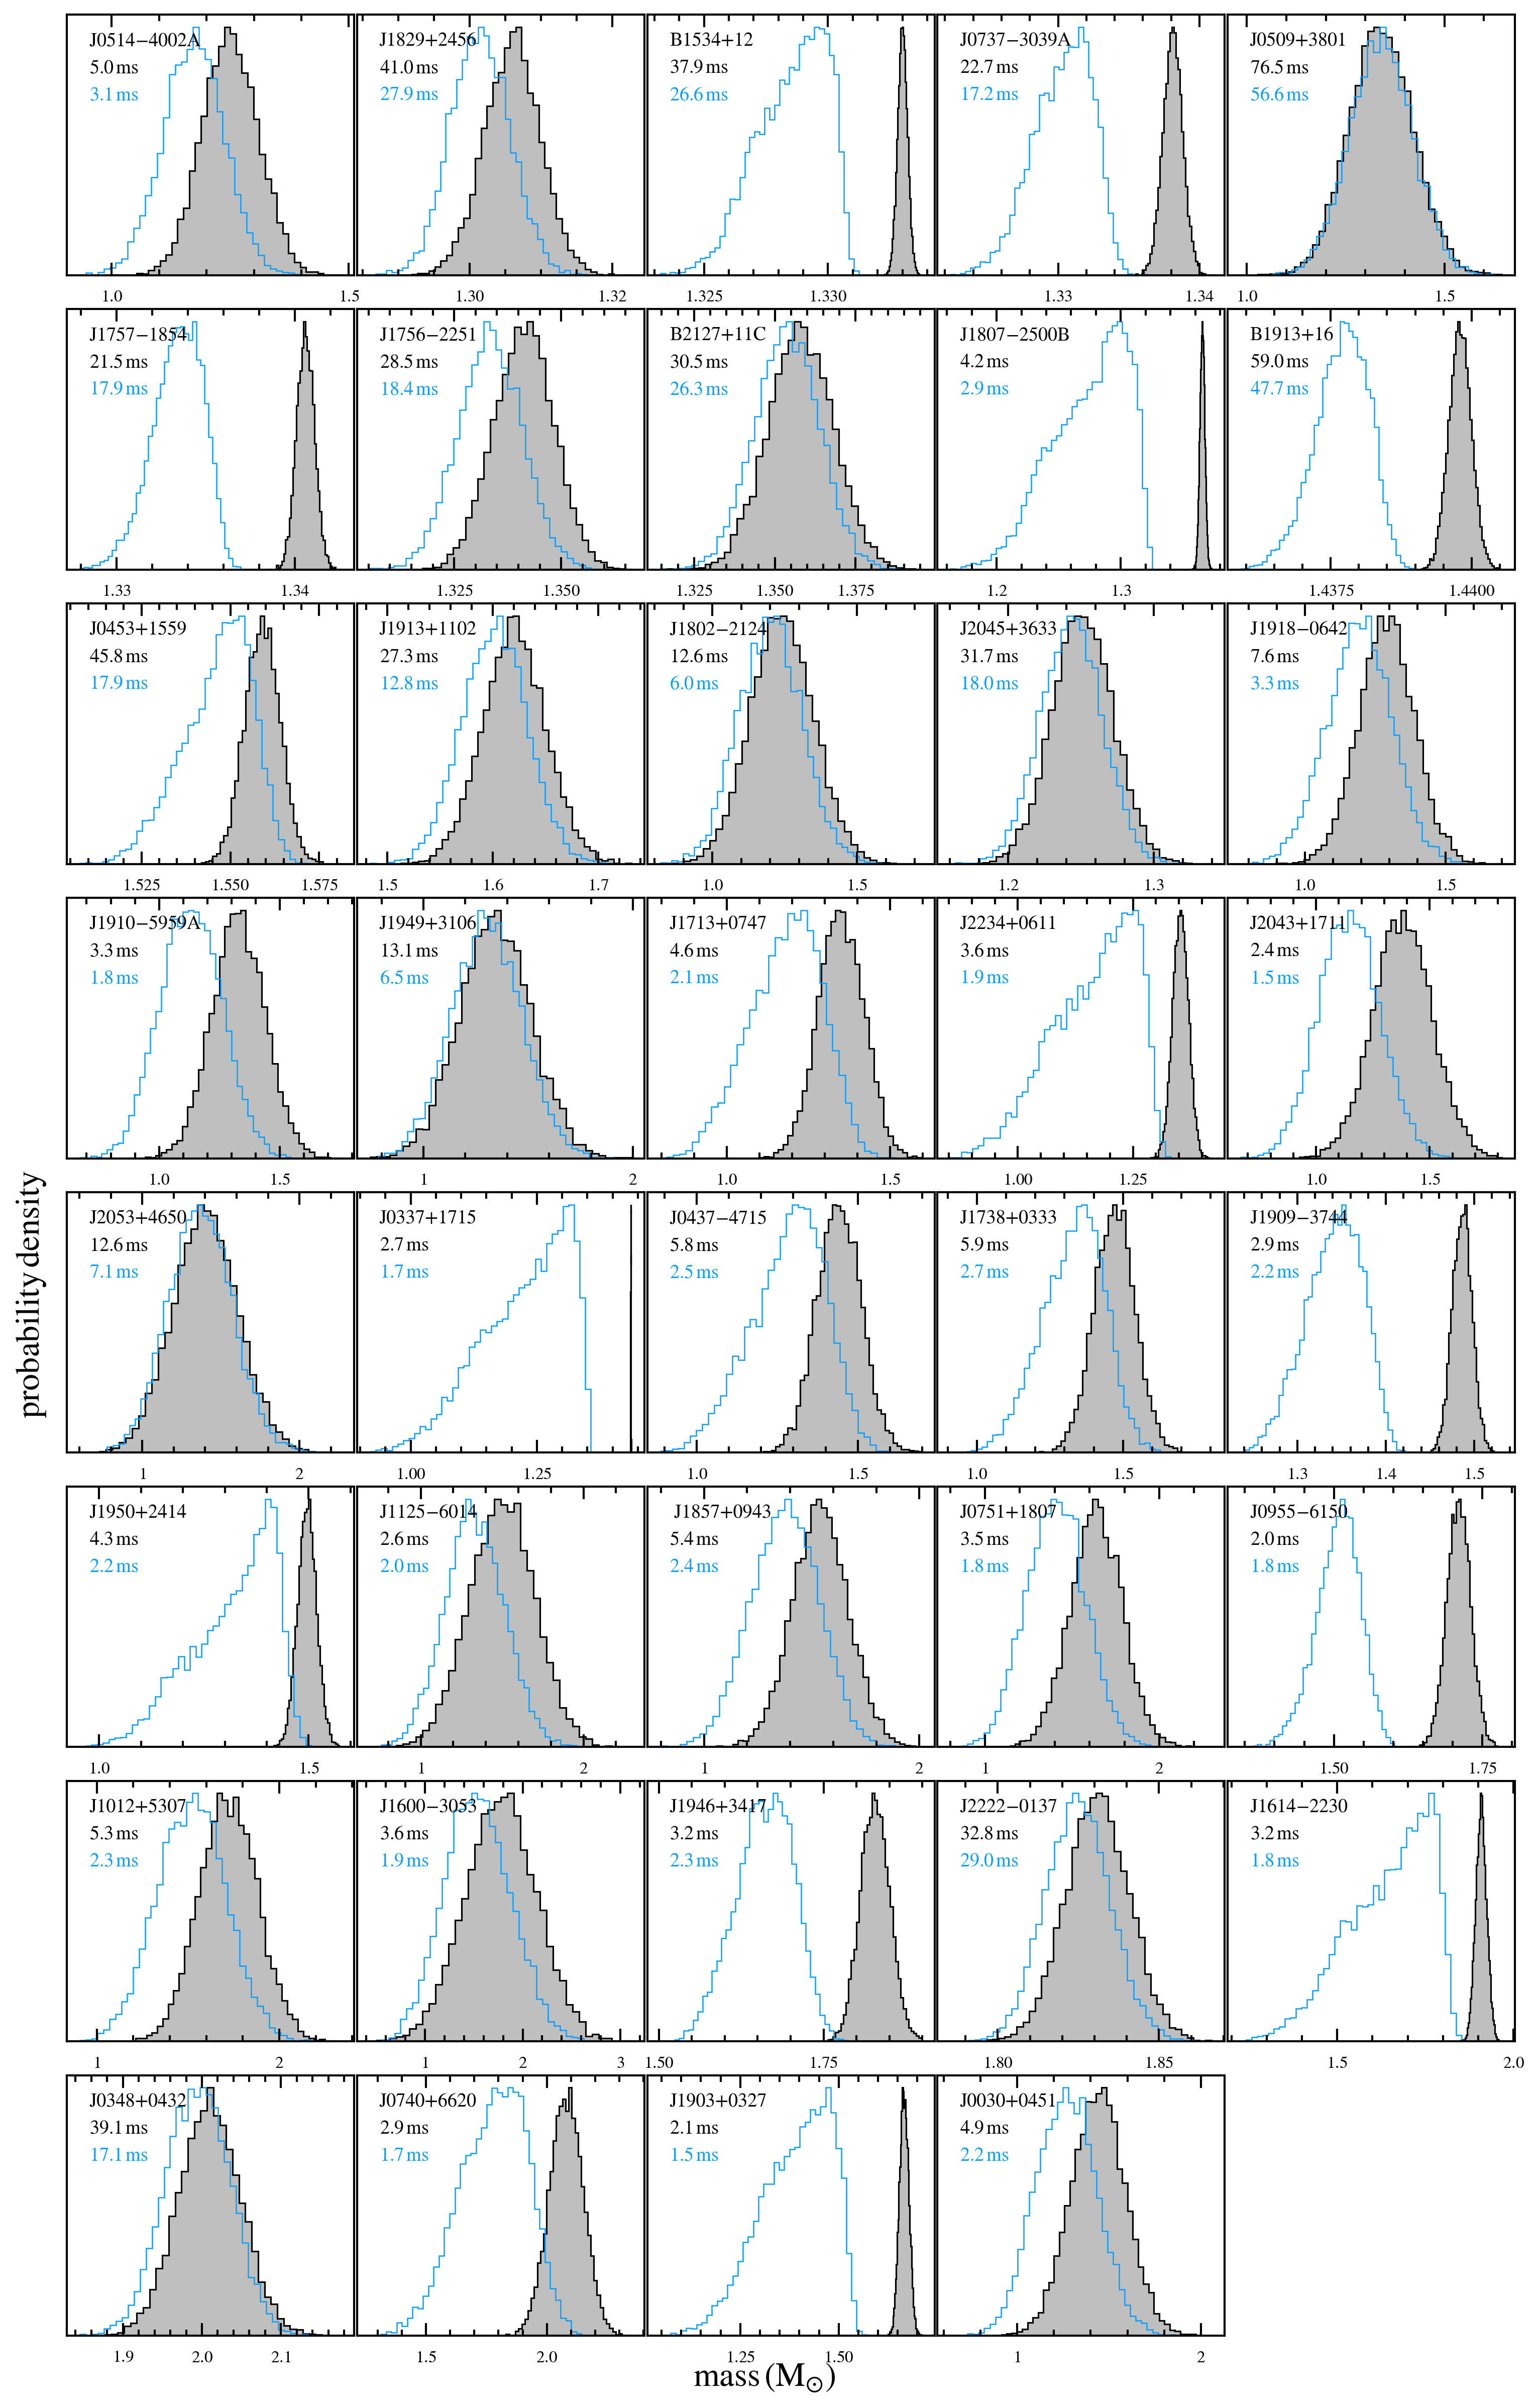

In [22]:
import corner.corner
import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

#tau=np.loadtxt('cal_li_percent.txt')
li=abs(phe_mr_39)
obs=abs(obs_mr_39)
spin_up=abs(ana_mr_39)

from decimal import Decimal 

data_id = sort_mr_indexs

for i in sort_mr_indexs:
    label_names=pnames[i]
    plt.rcParams["figure.figsize"] = (6.2,10)#6.2 10
    plt.subplot(8,5,i+1)
    
    p0_lab=format(df_mr_39_partinfo['P0'][i]*1000 , '.1f')
    p0_li_percent=format(df_mr_39_partinfo['p0phe'][i]*1000, '.1f')
    p0_m_ana=format(df_mr_39_partinfo['p0ana'][i]*1000 , '.1f')
    
    plt.grid(False)
    
    fre_num_oran, x_edge_oran = np.histogram(obs[i*10000 : (i+1)*10000 ],bins=40)
        
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='grey',fill=True,alpha=0.5,ls='-') 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',fill=0,alpha=1,ls='-',lw=0.38) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',lw=0.001,alpha=0.001,ls='-',label=r'{}'.format(pnames[i])) 
    plt.stairs(fre_num_oran/np.max(fre_num_oran),x_edge_oran,color='k',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_lab)) 
    
    #fre_num_li, x_edge_li = np.histogram(li[i*10000 : (i+1)*10000 ],bins=40)
    #plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.3,ls='-') 
    #plt.stairs(fre_num_li/np.max(fre_num_li),x_edge_li,color='#ff7f0e',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_li_percent))
    
    fre_num_spin_up, x_edge_spin_up = np.histogram(spin_up[i*10000 : (i+1)*10000 ],bins=40)
    plt.stairs(fre_num_spin_up/np.max(fre_num_spin_up),x_edge_spin_up,color='#089FFF',lw=0.3,ls='-')
    plt.stairs(fre_num_spin_up/np.max(fre_num_spin_up),x_edge_spin_up,color='#089FFF',lw=0.001,alpha=0.00,ls='-',label=r'${}\,\rm ms$'.format( p0_m_ana) )
    
    
    plt.xticks(fontsize=4)
    plt.yticks(fontsize=4)
    plt.yticks([])
    plt.subplots_adjust(wspace = 0.01)

            
    plt.legend(loc='upper left',labelcolor=['black','black','#089FFF'],frameon=0,bbox_to_anchor=(-0.17,1),fontsize=4.6)

plt.text(2.9, -0.2, r'$ \rm mass \,(M_{\odot})$', ha='center', fontsize=8)
plt.text(-0.2, 4.2, r'$\rm probability\,\,density$', va='center', rotation='vertical', fontsize=8)

plt.subplots_adjust(wspace=0.01, hspace=0.13)

#plt.savefig(parent_dir_path+'/figures/fig1.pdf')
plt.show()

# figures6 spin period and mass

In [20]:
main_direct=parent_dir_path+'/demos/'
#Pname	mr	mrerr	ms	mserr	P0
obs_39mr_err=df_mr_39_all['mrerr']
obs_39mr_mean=df_mr_39_all['mr']
obs_39p_mean=df_mr_39_all['P0']*1000

phe_39pran_mean=phe_pran_39*1000
phe_39pran_err=(np.loadtxt(main_direct+'phe_pran_err.txt') ) * 1000
phe_39mr_err=np.zeros(39)
phe_39mr_mean=np.zeros(39)
for i in range(39):
    phe_39mr_err[i]=np.std(phe_mr_39[i*10000:(i+1)*10000])
    phe_39mr_mean[i]=np.mean(phe_mr_39[i*10000:(i+1)*10000])

In [21]:
main_direct=parent_dir_path+'/demos/'

ana_pran39=(np.loadtxt(main_direct+'ana_pran_39.txt') ) * 1000
ana_39p_mean=np.zeros(39)
ana_39p_err =np.zeros(39)
for i in range(39):
    ana_39p_err[i]=np.std(ana_pran39[i*10000:(i+1)*10000])*0.9

In [22]:
obs_39mr_err=df_mr_39_all['mrerr']
obs_39mr_mean=df_mr_39_all['mr']
obs_39p_mean=df_mr_39_all['P0']*1000

ana_p0_mean=df_mr_39_partinfo['p0ana']*1000

phe_39pran_mean=ana_p0_mean
phe_39pran_err =ana_39p_err
phe_39mr_err=np.zeros(39)
phe_39mr_mean=np.zeros(39)
for i in range(39):
    phe_39mr_err[i]=np.std(ana_mr_39[i*10000:(i+1)*10000])
    phe_39mr_mean[i]=np.mean(ana_mr_39[i*10000:(i+1)*10000])

In [23]:
import os
import glob
import pandas as pd
parent_dir_path=os.path.abspath( os.path.join(os.getcwd(),'..') )
dns_excel_name = pd.ExcelFile(parent_dir_path+'/NSmassData/DNS_mass.xlsx')
nswd_excel_name = pd.ExcelFile(parent_dir_path+'/NSmassData/NSmass_mr_ms.xlsx')
dns_sheet_names=dns_excel_name.sheet_names
nswd_sheet_names=nswd_excel_name.sheet_names
dns_df  = pd.read_excel(dns_excel_name,sheet_name=dns_sheet_names[0]) 
nswd_df  = pd.read_excel(nswd_excel_name,sheet_name=nswd_sheet_names[0]) 
nswd_df2=pd.read_excel(nswd_excel_name,sheet_name=nswd_sheet_names[1]) 
dns_mass_tables=dns_df[['Pname','mr','mrerr','ms','mserr','P0','P1','Pb','observation']]
nswd_mass_tables=nswd_df[[ 'PSRName','mNS','mNSerror','mc','P0','P1','Pb','observation' ]]
nswd_mass_tables2=nswd_df2[ [ 'PSRName','mNS','mNSerror','mc','P0','observation' ]  ]

In [24]:
hxray_ns=nswd_mass_tables2 [ nswd_mass_tables2['P0']>0 ]
spider_ns=nswd_mass_tables[27:]
spider_ns

,PSRName,mNS,mNSerror,mc,P0,P1,Pb,observation
27,J1723–2837,1.22,0.26,0.360,0.001856,7.500000e-21,0.615436,optical
28,J2039-5617,1.30,0.10,0.200,0.002651,1.416400e-20,0.227980,gamma
29,J2339−0533,1.64,0.27,0.350,0.002884,1.410200e-20,0.193098,optical
30,J1023+0038,1.71,0.16,0.240,0.001688,5.300000e-21,0.198096,optical
31,J2129-0429,1.74,0.18,0.440,0.007620,0.000000e+00,0.635227,optical
32,J2215+5135,2.28,0.10,0.250,0.002610,3.340000e-20,0.172502,optical
33,J1555-2908,1.67,0.07,0.060,0.001788,4.455020e-20,0.233500,optical
34,J1301+0833,1.74,0.20,0.035,0.001840,0.000000e+00,0.270000,optical
35,J1810+1744,2.13,0.04,0.065,0.001660,0.000000e+00,0.150000,optical
36,J1653-0158,2.17,0.21,0.014,0.001968,8.500000e-22,0.051945,gamma


In [25]:
hxray_ns

,PSRName,mNS,mNSerror,mc,P0,observation
0,J1141-6545,1.27,0.01,1.02,0.393898,radio
1,J2305+4707,1.38,0.07,1.26,1.066371,radio
3,J0045-7319,1.58,0.34,10.00,0.926276,radio
4,4U 1538-522,1.02,0.17,16.00,526.800000,xray
5,SMC X-1,1.21,0.12,18.00,0.710000,xray
6,XTE J1855-026,1.41,0.24,21.00,360.700000,xray
7,Cen X-3,1.57,0.16,24.00,4.800000,xray
8,LMC X-4,1.57,0.11,18.00,13.500000,xray
9,SAX J1802.7-2017,1.57,0.25,22.00,139.600000,xray
10,OAO 1657-415,1.74,0.30,17.50,37.300000,xray


In [26]:
addns1=np.array([1.291, 0.011,1.322, 144.1 ])
addns2=np.array([1.27, 0.01,1.01, 393.9 ])
addns3=np.array([1.58, 0.34,10,926.3 ])
addns4=np.array([1.38, 0.07,1.26,1066.4 ])

add_data_set=np.zeros((24,4))
add_data_set[0:10,:]=np.array(hxray_ns[ ['mNS','mNSerror','mc','P0'] ][3:15])
add_data_set[10:,:]=np.array(spider_ns[ ['mNS','mNSerror','mc','P0'] ])

add_data_radio_set=np.zeros(( 4,4 ))
add_data_radio_set[0,:]=addns1
add_data_radio_set[1,:]=addns2
add_data_radio_set[2,:]=addns3
add_data_radio_set[3,:]=addns4

In [27]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
#import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D

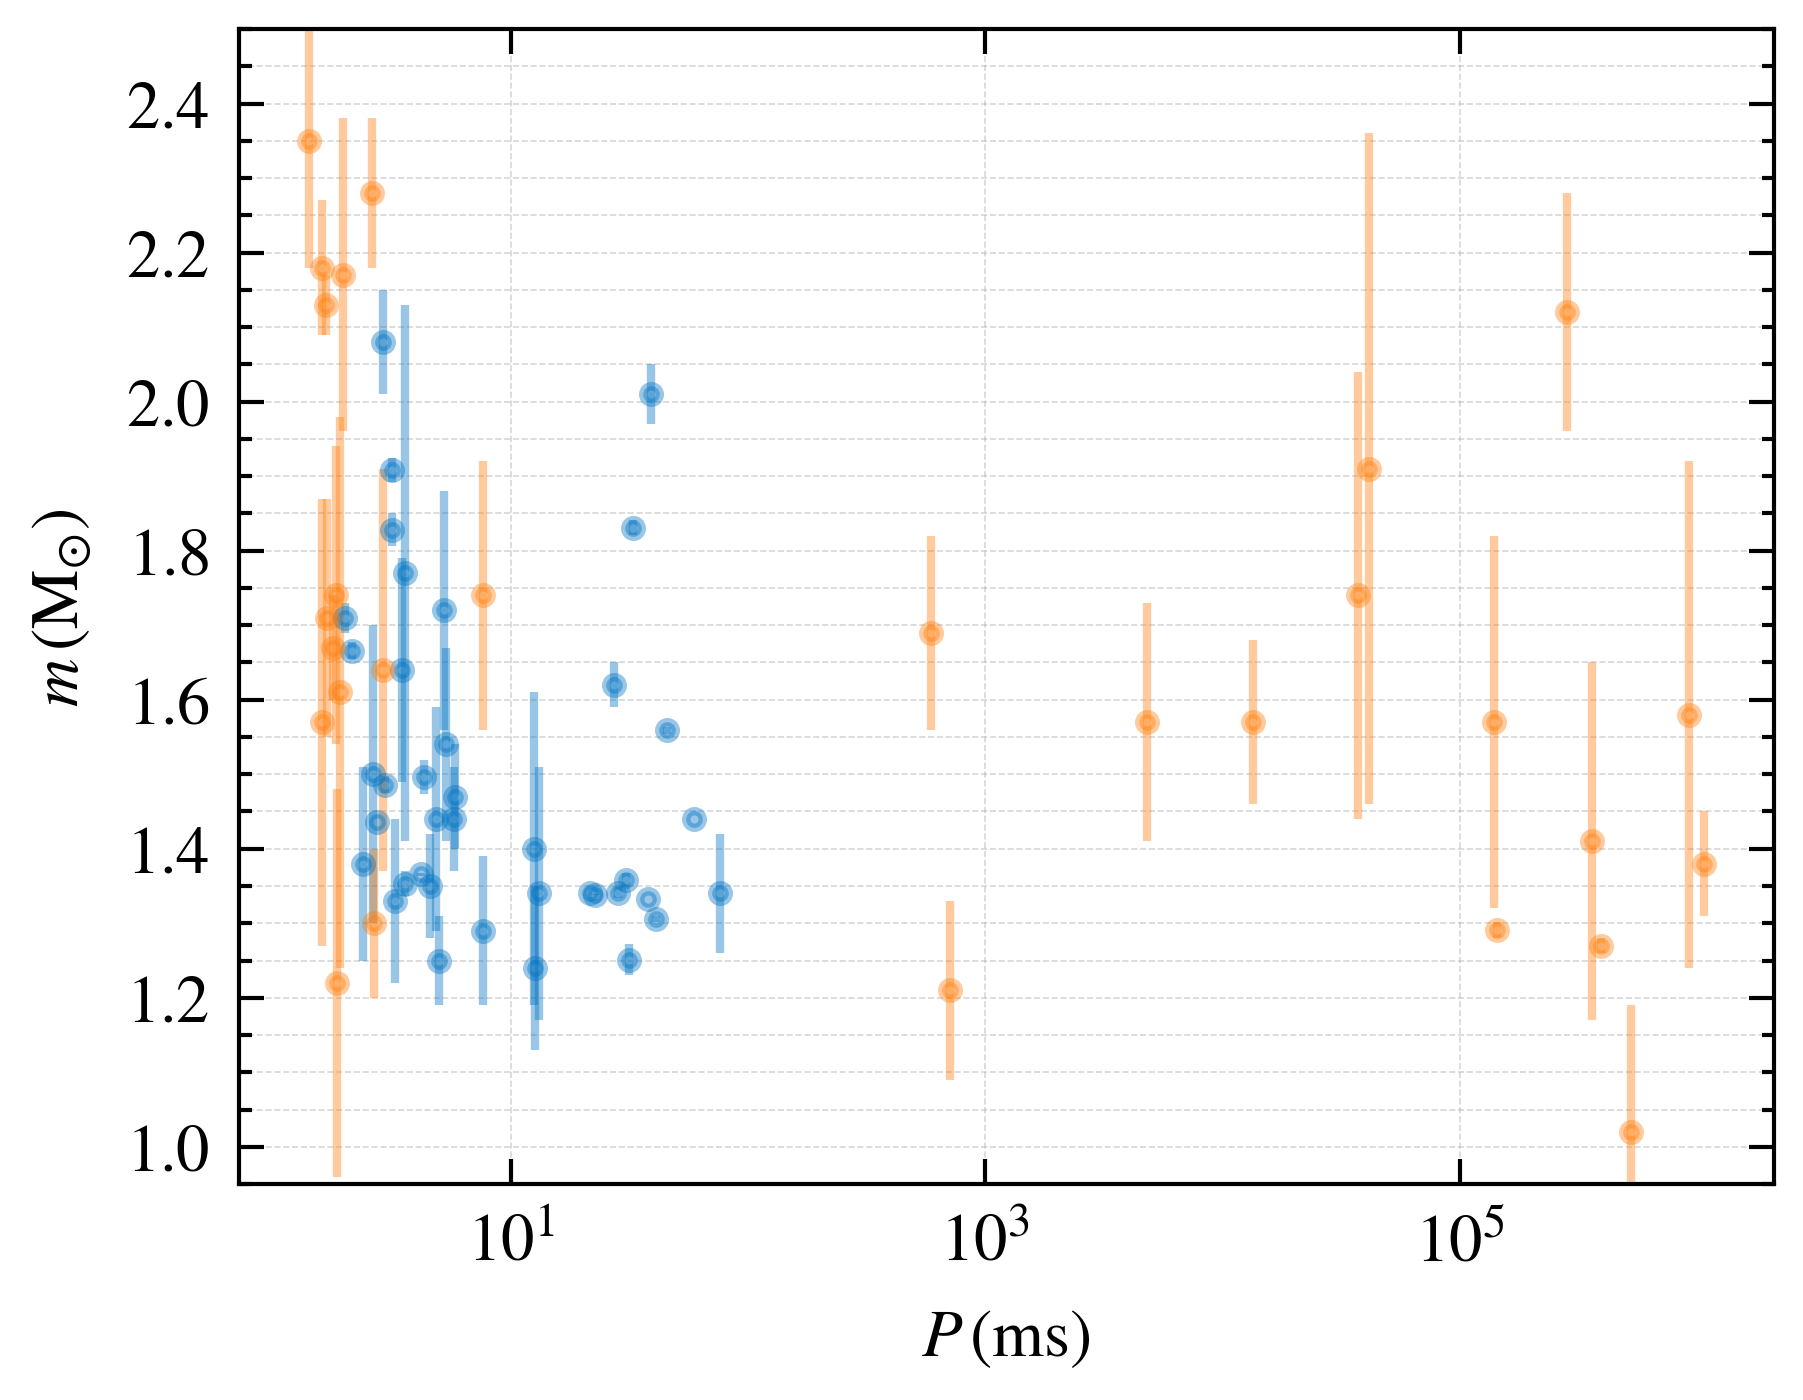

In [29]:
#add_data_set=np.loadtxt('ex_fig7_add.txt')

add_mv=add_data_set[:,0]
add_mr=add_data_set[:,1]
add_mc=add_data_set[:,2]
add_pv=add_data_set[:,3]

add_mv_radio=add_data_radio_set[:,0]
add_mr_radio=add_data_radio_set[:,1]
add_mc_radio=add_data_radio_set[:,2]
add_pv_radio=add_data_radio_set[:,3]

a_x_p_mean=obs_39p_mean
a_y_m_mean=obs_39mr_mean
a_y_m_err=obs_39mr_err

b_x_p_mean=phe_39pran_mean
b_y_m_mean=phe_39mr_mean
b_x_p_err =phe_39pran_err
b_y_m_err =phe_39mr_err
sv=df_mr_39_all['ms']*18
add_sv=add_mc*5

plt.grid(which='both',linestyle='--',lw=0.2,alpha=0.5)

#plt.scatter(a_x_p_mean, a_y_m_mean, lw=0.3,marker="o", s=2,edgecolors='#0072c1',facecolor='none',alpha=0.7,label=r'$\rm{radio}$')
#plt.scatter(b_x_p_mean,b_y_m_mean, lw=0.3, marker="o", s=sv,edgecolors='#ff7f0e',facecolor='none',alpha=0.7,label=r'$\rm{ANA}$')
#plt.scatter(add_pv*1000,add_mv, lw=0.3, marker="o", s=2,edgecolors='#ff7f0e',facecolor='none',alpha=0.7,label=r'$\rm{Others}$')
#plt.scatter(add_pv_radio*1000,add_mv_radio, lw=0.3, marker="o", s=2,edgecolors='#ff7f0e',facecolor='none',alpha=0.7,label=r'$\rm{radio}$')

plt.errorbar(a_x_p_mean, a_y_m_mean, yerr=a_y_m_err, xerr=None, marker="o", ms=2,color='#0072c1',alpha=0.4,linestyle="none")# blue
plt.errorbar(add_pv_radio*1000, add_mv_radio, yerr=add_mr_radio, xerr=None, marker="o", ms=2,color='#ff7f0e',alpha=0.4,linestyle="none")
plt.errorbar(add_pv*1000, add_mv, yerr=add_mr, xerr=None, marker="o", ms=2,color='#ff7f0e',alpha=0.4,linestyle="none")#orange


label_v_p_x=2.*10**5
label_v_p_y=2.355
yerr_v_label = np.array([[0], [0.08]]) 

#x_error_line = Line2D([0, 1], [0, 0], color='gray', linestyle='None', lw=1, label='1$\sigma$ ')  # Horizontal line for x-error
#y_error_line = Line2D([0, 0], [0, 1], color='gray', linestyle='None', lw=1, label='1$\sigma$ ') 


#plt.plot(a_x_p_mean, a_y_m_mean,lw=0.0,alpha=0)

plt.xscale('log')

#locs, labels = plt.xticks()    
#print(locs)
#plt.xticks([1.e+0, 1.e+1, 1.e+2 ],['1','10','100']);

#x_error_line = Line2D([0, 1], [0, 0], color='black', linestyle='None', lw=1, label='1$\sigma$ ')
#plt.legend(handles=[x_error_line], loc='upper right', fontsize=8, handlelength=2, handletextpad=0.9)

#plt.xlim(1,100)
plt.ylim(0.95,2.5)
plt.xlabel(r'$P\,(\rm{ms})$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')

plt.savefig(parent_dir_path+'/figures/ext_fig10_up_no_lab.pdf')
plt.show()

# luminosity vs m figure

In [31]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
#import scienceplots
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

In [32]:
dns_table=pd.read_excel(parent_dir_path+'/NSmassData/flux_vs_mass/flux_DNS_mass.xlsx')
ns_x_table1=pd.read_excel(parent_dir_path+'/NSmassData/flux_vs_mass/flux_NSmass_mr_ms.xlsx',sheet_name='Sheet1')
ns_x_table2=pd.read_excel(parent_dir_path+'/NSmassData/flux_vs_mass/flux_NSmass_mr_ms.xlsx',sheet_name='Sheet2')

dns_tem=list()
for i in range(len(dns_table['s1400'])):
    m_l=np.zeros(4)
    if dns_table['s1400'][i] != 0:
        a_temp= ( np.random.normal( dns_table['dl'][i], dns_table['dl'][i]*0.2, 10000 ) )**2*np.random.normal( dns_table['s1400'][i], dns_table['es'][i], 10000 ) 
        m_l[0]=dns_table['mr'][i]
        m_l[1]=dns_table['mrerr'][i]
        m_l[2]=np.mean(a_temp)
        m_l[3]=np.std(a_temp)
        dns_tem.append(m_l)

ns_x_tem1=list()
for i in range(len(ns_x_table1['s1400'])):
    m_l=np.zeros(4)
    if ns_x_table1['s1400'][i] != 0:
        b_temp= ( np.random.normal( ns_x_table1['dl'][i], ns_x_table1['dl'][i]*0.2, 10000 ) )**2*np.random.normal( ns_x_table1['s1400'][i], ns_x_table1['es'][i], 10000 ) 
        m_l[0]=ns_x_table1['mNS'][i]
        m_l[1]=ns_x_table1['mNSerror'][i]
        m_l[2]=np.mean(b_temp)
        m_l[3]=np.std(b_temp)
        ns_x_tem1.append(m_l)
ns_x_tem2=list()
for i in range(len(ns_x_table2['s1400'])):
    m_l=np.zeros(4)
    if ns_x_table2['s1400'][i] != 0:
        c_temp= ( np.random.normal( ns_x_table2['dl'][i], ns_x_table2['dl'][i]*0.2, 10000 ) )**2*np.random.normal( ns_x_table2['s1400'][i], ns_x_table2['es'][i], 10000 ) 
        m_l[0]=ns_x_table2['mNS'][i]
        m_l[1]=ns_x_table2['mNSerror'][i]
        m_l[2]=np.mean(c_temp)
        m_l[3]=np.std(c_temp)
        ns_x_tem2.append(m_l)
m_l_tem=dns_tem + ns_x_tem1 + ns_x_tem2


In [33]:
import bilby
import os
import glob
import numpy as np
from scipy import interpolate
import corner.corner
#import scienceplots
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])


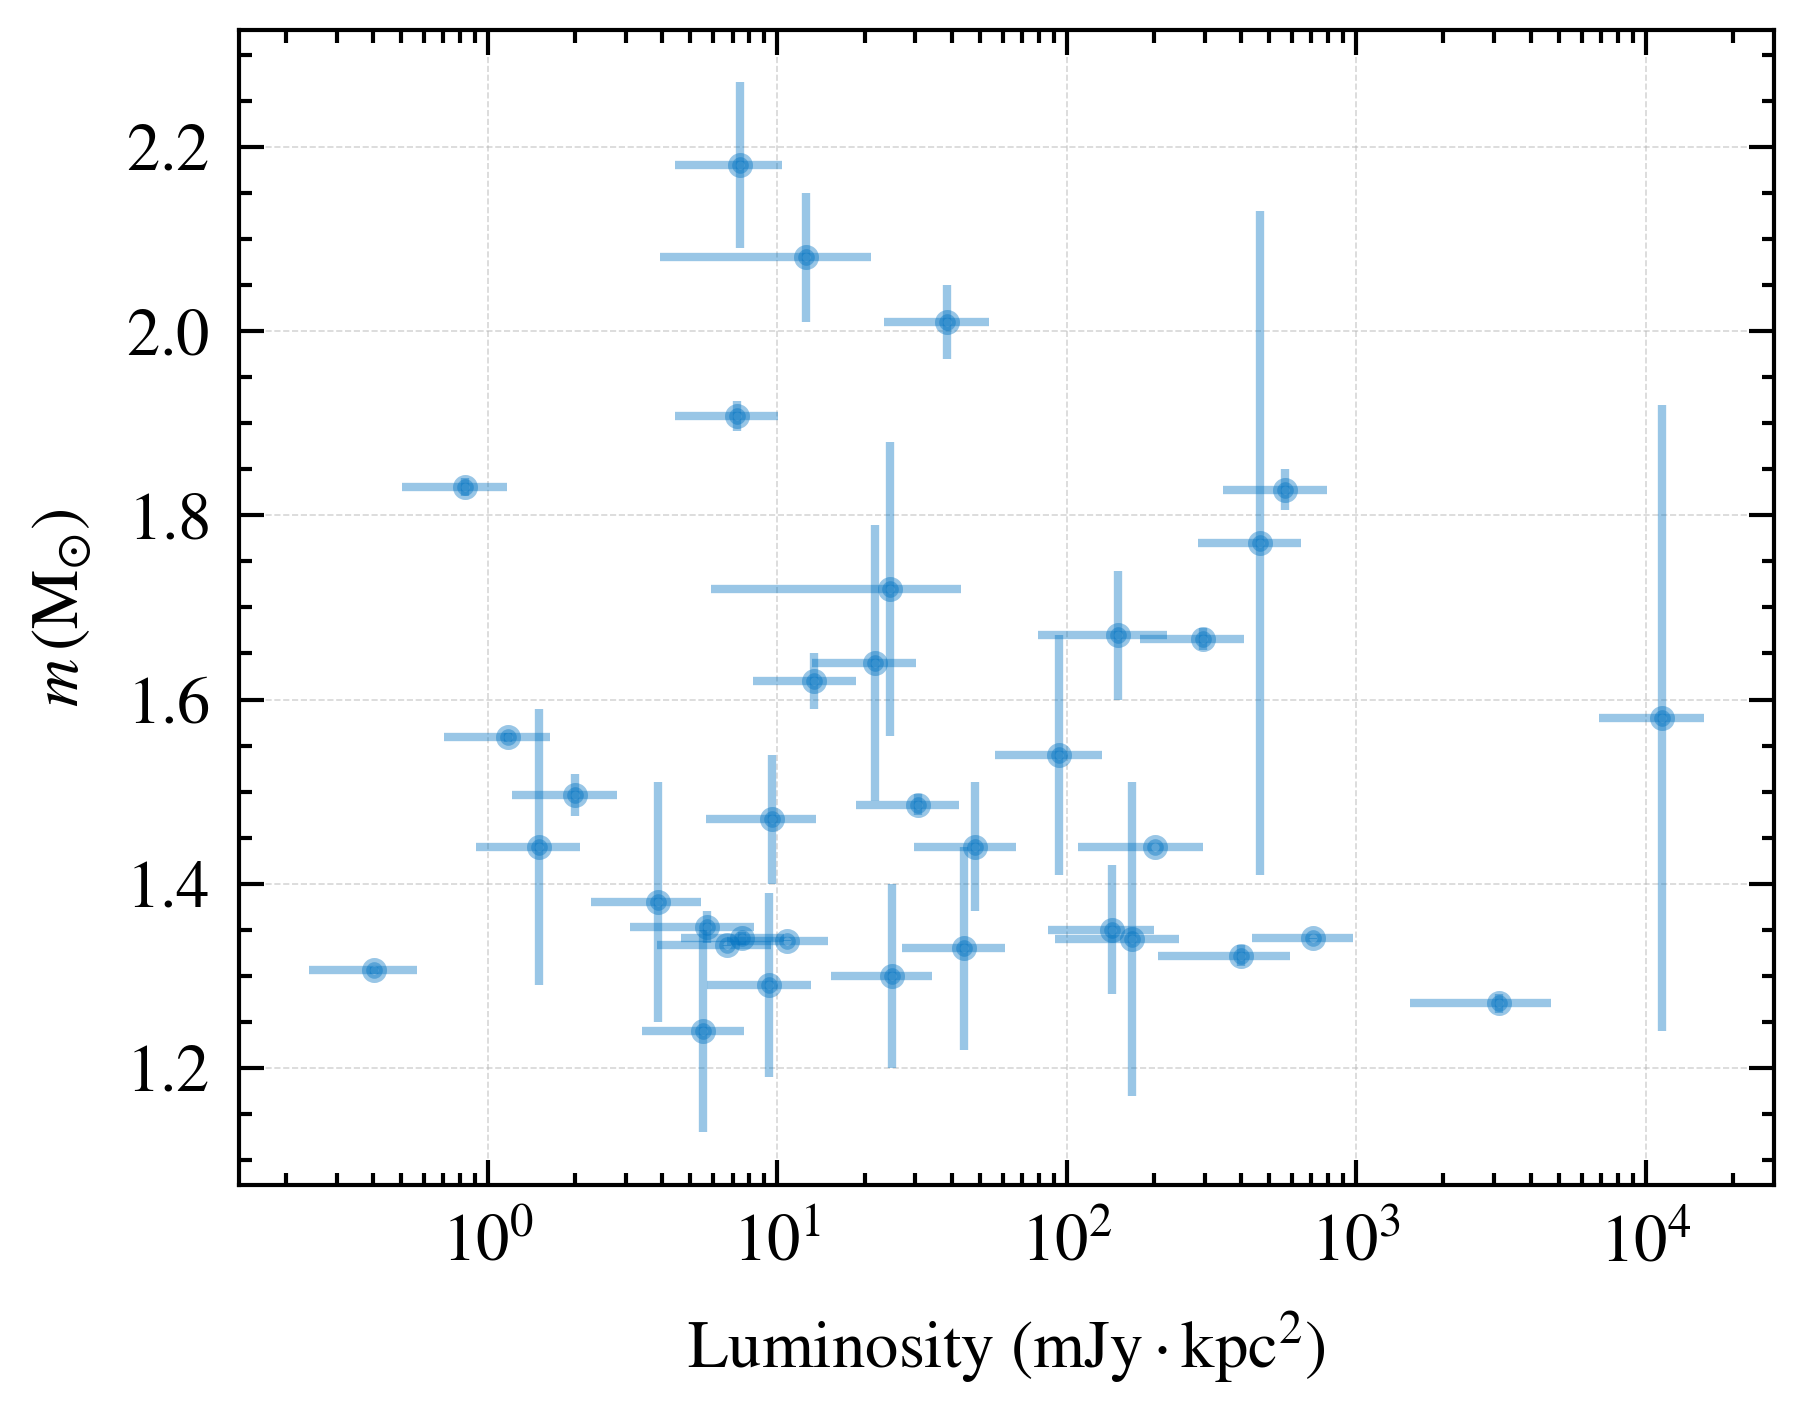

In [34]:
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D

yval = np.array(m_l_tem)[:,0]
xval = np.array(m_l_tem)[:,2]  *4*np.pi
yerr1 = np.array(m_l_tem)[:,1]
xerr1 = np.array(m_l_tem)[:,3]  *4*np.pi
plt.grid( which='major',linestyle='--',lw=0.2,alpha=0.5)

plt.errorbar(xval, yval, xerr= xerr1, yerr=yerr1, marker="o", ms=2,color='#0072c1',alpha=0.4,linestyle="none")

plt.xscale('log')


plt.xlabel(r'$\rm Luminosity\,\,(mJy\cdot kpc^2)$')
plt.ylabel(r'$m\,(\rm{M_{\odot}})$')



#x_error_line = Line2D([0, 1], [0, 0], color='gray', linestyle='None', lw=1, label='1$\sigma$ ')  # Horizontal line for x-error
#y_error_line = Line2D([0, 0], [0, 1], color='gray', linestyle='None', lw=1, label='1$\sigma$ ')  # Vertical line for y-error

# Add legend
#plt.legend(handles=[x_error_line], loc='upper right', fontsize=8, handlelength=2, handletextpad=0.9)


plt.savefig(parent_dir_path+'/figures/extended_fig10_down_no_label.pdf')
plt.show()